# Balkendiagramm, Stabdiagramm und Säulendiagramm

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_bar_chart(data=None, frequency_table=None, diagramm_typ="stabdiagramm", orientation="vertikal",
                     title=None, xlabel=None, ylabel=None, frequency_type="absolute"):
    """
    Erstellt ein Stabdiagramm oder Balkendiagramm basierend auf den angegebenen textbasierten Daten oder einer Häufigkeitstabelle.
    Die Funktion berechnet automatisch die Häufigkeit jeder Kategorie, wenn keine Häufigkeitstabelle übergeben wird.
    Der Typ des Diagramms kann spezifiziert werden: "stabdiagramm" (sehr schmale Balken), "balkendiagramm" 
    für Balkendiagramme. Balkendiagramme können vertikal oder horizontal abgetragen werden.

    Parameters
    ----------
    data : list, optional
        Eine Liste von textbasierten Werten (Kategorien), die im Stabdiagramm dargestellt werden sollen.
        
    frequency_table : list of tuples, optional
        Eine Liste von Tupeln, wobei das erste Element die Kategorie (z.B. "apple") und das zweite Element 
        die Häufigkeit (z.B. 3) ist. Wenn diese übergeben wird, werden die Häufigkeiten nicht automatisch berechnet.

    diagramm_typ : str, optional
        Legt den Diagrammtyp fest. Akzeptiert "stabdiagramm" (sehr schmale Balken vertikal) oder "balkendiagramm" 
        (vertikale oder horizontale Balken je nach "orientation"-Parameter).

    orientation : str, optional
        Gibt die Ausrichtung des Balkendiagramms an. Akzeptiert "vertikal" oder "horizontal". 
        Wird nur verwendet, wenn "diagramm_typ='balkendiagramm'" gesetzt ist.

    title : str, optional
        Titel des Diagramms.

    xlabel : str, optional
        Beschriftung der x-Achse.

    ylabel : str, optional
        Beschriftung der y-Achse.

    frequency_type : str, optional
        "absolute" für absolute Häufigkeit, "relative" für relative Häufigkeit in Prozent.

    Plot
    ----
    Ein matplotlib-Stabdiagramm oder Balkendiagramm mit:
        - Einer Darstellung der Häufigkeiten der Kategorien.
        - Texten über jedem Balken, die die Anzahl der Datenpunkte pro Kategorie anzeigen (absolut oder relativ).
        - Optional vertikalen gestrichelten Linien über jedem Balken zur optischen Hervorhebung.

    Beispiele
    ---------
    >>> data = ["apple", "banana", "apple", "orange", "banana", "banana"]
    >>> create_bar_chart(data=data, diagramm_typ="stabdiagramm", title="Früchte", xlabel="Frucht", ylabel="Anzahl", frequency_type="relative")
    
    >>> frequency_table = [("apple", 3), ("banana", 2), ("orange", 1)]
    >>> create_bar_chart(frequency_table=frequency_table, diagramm_typ="balkendiagramm", orientation="horizontal",
                         title="Häufigkeit der Früchte", xlabel="Anzahl", ylabel="Frucht", frequency_type="absolute")
    """
    
    if frequency_table is not None:
        # Wenn eine Häufigkeitstabelle übergeben wurde, extrahiere die Kategorien und deren Häufigkeit
        categories, frequencies = zip(*frequency_table)
    elif data is not None:
        # Wenn nur die Daten übergeben wurden, berechne die Häufigkeiten
        categories, frequencies = np.unique(data, return_counts=True)
    else:
        raise ValueError("Entweder \"data\" oder \"frequency_table\" muss übergeben werden.")
    
    # Berechne die relative Häufigkeit, wenn 'relative' gewählt ist
    if frequency_type == "relative":
        total = sum(frequencies)
        frequencies = [(freq / total) * 100 for freq in frequencies]
        ylabel = ylabel if ylabel else "Häufigkeit (%)"  # Standardmäßige Y-Achsen-Beschriftung für relative Häufigkeit
    else:
        ylabel = ylabel if ylabel else "Häufigkeit"  # Standardmäßige Y-Achsen-Beschriftung für absolute Häufigkeit

    fig, axes = plt.subplots(figsize=(8, 6))
    
    sns.set_palette("crest")

    # Entscheide über den Diagrammtyp
    if diagramm_typ == "stabdiagramm":
        # Erstelle ein Stabdiagramm (vertikale schmale Balken)
        sns.barplot(x=categories, y=frequencies, ax=axes, edgecolor="black", width=0.2)
        axes.set_xlabel(xlabel if xlabel else "Kategorien")
        axes.set_ylabel(ylabel)

    elif diagramm_typ == "balkendiagramm":
        if orientation == "vertikal":
            # Erstelle ein vertikales Balkendiagramm
            sns.barplot(x=categories, y=frequencies, ax=axes, edgecolor="black")
            axes.set_xlabel(xlabel if xlabel else "Kategorien")
            axes.set_ylabel(ylabel)
        elif orientation == "horizontal":
            # Erstelle ein horizontales Balkendiagramm
            sns.barplot(x=frequencies, y=categories, ax=axes, edgecolor="black")
            axes.set_xlabel(xlabel if xlabel else "Häufigkeit")
            axes.set_ylabel(ylabel if ylabel else "Kategorien")
        else:
            raise ValueError("Ungültige Orientierung. Verwende \"vertikal\" oder \"horizontal\".")
    
    else:
        raise ValueError("Ungültiger Diagrammtyp. Verwende \"stabdiagramm\" oder \"balkendiagramm\".")
    
    # Beschriftungen und (optional) vertikale Linien hinzufügen
    for i, freq in enumerate(frequencies):
        label = f"{freq:.1f}%" if frequency_type == "relative" else str(int(freq))
        if diagramm_typ == "stabdiagramm":
            # Text über den Balken bei vertikalem Stabdiagramm
            axes.text(i, freq + 0.05, label, ha="center", fontsize=10)
            # Vertikale gestrichelte Linien (nur für vertikale Stabdiagramme)
            axes.vlines(
                x=i,
                ymin=0,
                ymax=freq,
                color="grey",
                linestyle="--",
                alpha=0.3
            )
        elif diagramm_typ == "balkendiagramm":
            if orientation == "vertikal":
                # Text über den Balken bei vertikalem Balkendiagramm
                axes.text(i, freq + 0.05, label, ha="center", fontsize=10)
            elif orientation == "horizontal":
                # Text am Ende der Balken bei horizontalem Balkendiagramm
                axes.text(freq + 0.05, i, label, va="center", fontsize=10)
    
    # Setze den Titel des Diagramms
    axes.set_title(title if title else f"{diagramm_typ.capitalize()} der Kategorien")
    axes.grid(True, linestyle="--", alpha=0.7, axis="y" if diagramm_typ == "stabdiagramm" or orientation == "vertikal" else "x")

    # Wenn relative Häufigkeit, füge das Prozentzeichen an die x- oder y-Achse
    if frequency_type == "relative":
        if diagramm_typ == "stabdiagramm" or (diagramm_typ == "balkendiagramm" and orientation == "vertikal"):
            # Füge das Prozentzeichen an die y-Achse
            axes.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))
        elif diagramm_typ == "balkendiagramm" and orientation == "horizontal":
            # Füge das Prozentzeichen an die x-Achse
            axes.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))
    
    sns.despine()
    plt.tight_layout()

## 1. Beispiel: Stabdiagramm

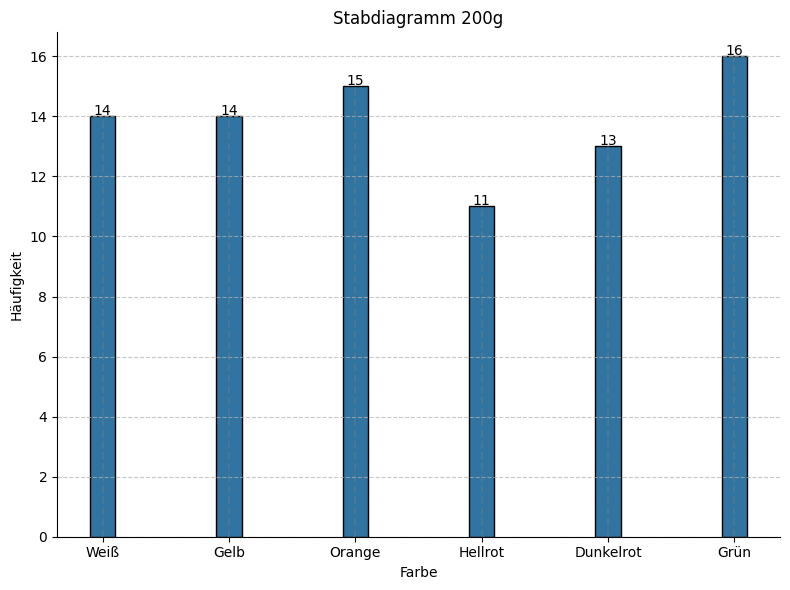

In [3]:
frequency_table = [('Weiß', 14), ('Gelb', 14), ('Orange', 15), ('Hellrot', 11), ('Dunkelrot', 13), ('Grün', 16)]
create_bar_chart(frequency_table=frequency_table, diagramm_typ="stabdiagramm", orientation="horizontal", title="Stabdiagramm 200g", xlabel="Farbe")

## 2. Beispiel: Balkendiagramm vertikal

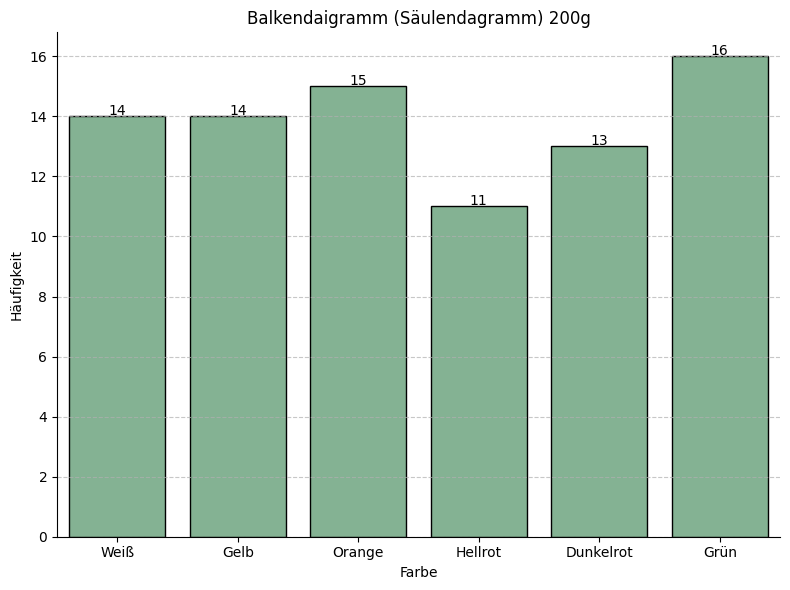

In [4]:
frequency_table = [('Weiß', 14), ('Gelb', 14), ('Orange', 15), ('Hellrot', 11), ('Dunkelrot', 13), ('Grün', 16)]
create_bar_chart(frequency_table=frequency_table, diagramm_typ="balkendiagramm", orientation="vertikal", title="Balkendaigramm (Säulendagramm) 200g", xlabel="Farbe")

## 3. Beispiel: Balkendiagramm horizontal (Stabdiagramm)

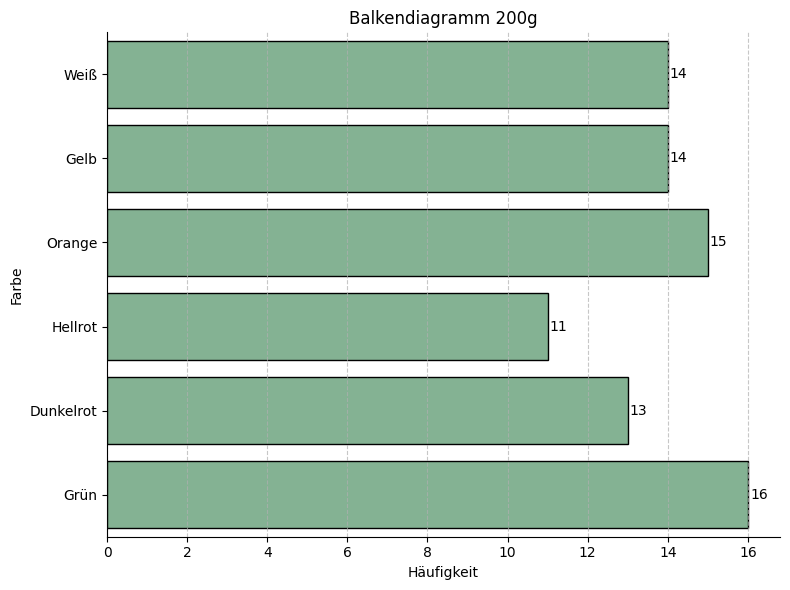

In [5]:
frequency_table = [('Weiß', 14), ('Gelb', 14), ('Orange', 15), ('Hellrot', 11), ('Dunkelrot', 13), ('Grün', 16)]
create_bar_chart(frequency_table=frequency_table, diagramm_typ="balkendiagramm", orientation="horizontal", title="Balkendiagramm 200g", ylabel="Farbe")

## 4. Beispiel: Stabdiagramm relative Häufigkeit

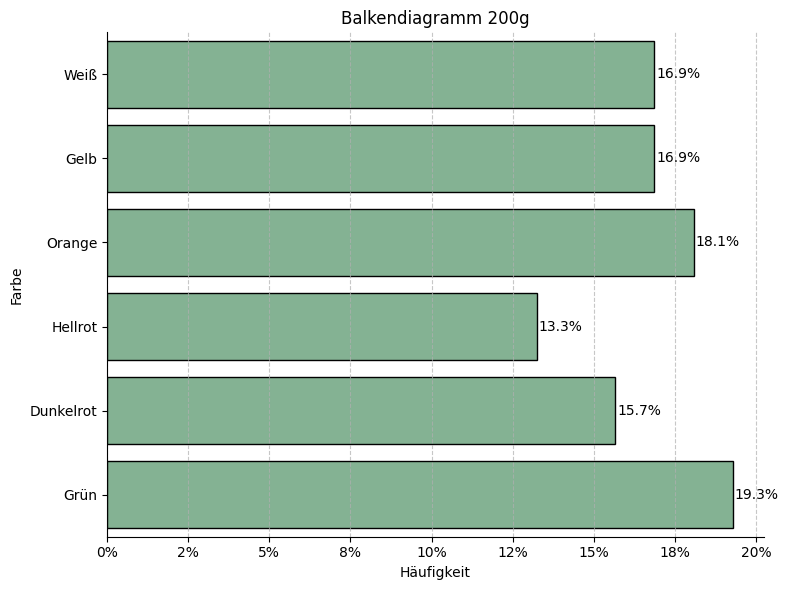

In [6]:
frequency_table = [('Weiß', 14), ('Gelb', 14), ('Orange', 15), ('Hellrot', 11), ('Dunkelrot', 13), ('Grün', 16)]
create_bar_chart(frequency_table=frequency_table, diagramm_typ="balkendiagramm", orientation="horizontal", title="Balkendiagramm 200g", ylabel="Farbe", frequency_type="relative")